In [0]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas
from pyspark.sql.functions import col
data_BASE_DIR = "dbfs:/mnt/mids-w261/"
display(dbutils.fs.ls(f"{data_BASE_DIR}"))
# Airline Data    
df_flights = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data_1y/")
# Weather data
df_weather1 = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_weather_data_1y/")
# Stations data      
df_stations = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/stations_data/stations_with_neighbors.parquet/")
# OTPW
df_otpw = spark.read.format("csv").option("header","true").load(f"dbfs:/mnt/mids-w261/OTPW_12M/OTPW_12M/")

path name size modificationTime dbfs:/mnt/mids-w261/HW5/ HW5/ 0 1753469443000 dbfs:/mnt/mids-w261/OTPW_12M/ OTPW_12M/ 0 1753469443000 dbfs:/mnt/mids-w261/OTPW_1D_CSV/ OTPW_1D_CSV/ 0 1753469443000 dbfs:/mnt/mids-w261/OTPW_36M/ OTPW_36M/ 0 1753469443000 dbfs:/mnt/mids-w261/OTPW_3M/ OTPW_3M/ 0 1753469443000 dbfs:/mnt/mids-w261/OTPW_3M_2015.csv OTPW_3M_2015.csv 1500620247 1741625185000 dbfs:/mnt/mids-w261/OTPW_3M_2015_delta/ OTPW_3M_2015_delta/ 0 1753469443000 dbfs:/mnt/mids-w261/OTPW_60M/ OTPW_60M/ 0 1753469443000 dbfs:/mnt/mids-w261/OTPW_60M_Backup/ OTPW_60M_Backup/ 0 1753469443000 dbfs:/mnt/mids-w261/airport-codes_csv.csv airport-codes_csv.csv 6232459 1740508595000 dbfs:/mnt/mids-w261/datasets_final_project/ datasets_final_project/ 0 1753469443000 dbfs:/mnt/mids-w261/datasets_final_project_2022/ datasets_final_project_2022/ 0 1753469443000 dbfs:/mnt/mids-w261/final_project_winter_2025/ final_project_winter_2025/ 0 1753469443000 dbfs:/mnt/mids-w261/student-groups/ student-groups/ 0 1753469443000 dbfs:/mnt/mids-w261/students-groups/ students-groups/ 0 1753469443000

# Shyam Engineered Features Added:

In [0]:
# Read in airport codes and timezones, drop columns to those two, filter out rows with no codes

df_airport_timezones = (spark.read
        .option("header", True)
        .option("inferSchema", True)
        .csv("dbfs:/FileStore/Group_4_3/Data/airports_codes_timezones_with_header.csv")
        .drop("airport_id", "name", "city", "country", "icao_code", "latitude", "longitude", "altitude", "dst", "tz_db_timezone", "type", "source") # drop everything but iata code and timezone
        .filter(F.col("iata_code") != "\\N") #filter out airports with no iata code
)

display(df_airport_timezones)

iata_code timezone GKA 10 MAG 10 HGU 10 LAE 10 POM 10 WWK 10 UAK -3 GOH -3 SFJ -3 THU -4 AEY 0 EGS 0 HFN 0 HZK 0 IFJ 0 KEF 0 PFJ 0 RKV 0 SIJ 0 VEY 0 YAM -5 YAY -3.5 YAZ -8 YBB -7 YBC -5 YBG -5 YBK -6 YBL -8 YBR -6 YCB -7 YCD -8 YCG -8 YCH -4 YCL -4 YCO -7 YCT -7 YCW -8 YCY -5 YZS -5 YDA -8 YDB -8 YDF -3.5 YDL -8 YDN -6 YDQ -7 YEG -7 YEK -6 YEN -6 YET -7 YEU -6 YEV -7 YFB -5 YFC -4 YFE -5 YFO -6 YFR -7 YFS -7 YGK -5 YGL -5 YGP -5 YGQ -5 YGR -5 YHB -6 YHD -6 YHI -7 YHK -7 YHM -5 YHU -5 YHY -7 YHZ -4 YIB -5 YIO -5 YJN -5 YJT -3.5 YKA -8 YKF -5 YKL -5 YKY -6 YKZ -5 YLD -5 YLJ -6 YLL -7 YLT -5 YLW -8 YMA -8 YMJ -6 YMM -7 YMO -5 YMW -5 YMX -5 YNA -5 YND -5 YNM -5 YOC -8 YOD -7 YOJ -7 YOW -5 YPA -6 YPE -7 YPG -6 YPL -5 YPN -5 YPQ -5 YPR -8 YPY -7 YQA -5 YQB -5 YQF -7 YQG -5 YQH -8 YQK -6 YQL -7 YQM -4 YQQ -8 YQR -6 YQT -5 YQU -7 YQV -6 YQW -6 YQX -3.5 YQY -4 YQZ -8 YRB -6 YRI -5 YRJ -5 YRM -7 YRT -6 YSB -5 YSC -5 YSJ -4 YSM -7 YSR -5 YSU -4 YSY -7 YTE -5 YTH -6 YTR -5 YTS -5 YTZ -5 YUB -7 YUL -5 YUT -6 YUX -5 YUY -5 YVC -6 YVG -7 YVM -5 YVO -5 YVP -5 YVQ -7 YVR -8 YVT -6 YVV -5 YWA -5 YWG -6 YWK -4 YWL -8 YWY -7 YXC -7 YXD -7 YXE -6 YXH -7 YXJ -7 YXL -6 YXP -5 YXR -5 YXS -8 YXT -8 YXU -5 YXX -8 YXY -8 YYB -5 YYC -7 YYD -8 YYE -8 YYF -8 YYG -4 YYH -7 YYJ -8 YYL -6 YYN -6 YYQ -6 YYR -4 YYT -3.5 YYU -5 YYW -5 YYY -5 YYZ -5 YZD -5 YZE -5 YZF -7 YZH -7 YZP -8 YZR -5 YZT -8 YZU -7 YZV -5 YZW -8 YZX -4 ZFA -8 ZFM -7 QLD 1 BUJ 1 BJA 1 ALG 1 DJG 1 VVZ 1 TMR 1 GJL 1 MZW 1 AAE 1 CZL 1 TEE 1 HRM 1 TID 1 TIN 1 CFK 1 TAF 1 TLM 1 ORN 1 BFW 1 MUW 1 AZR 1 BSK 1 ELG 1 GHA 1 HME 1 INZ 1 TGR 1 LOO 1 TMX 1 OGX 1 IAM 1 COO 1 OUA 0 BOY 0 ACC 0 TML 0 NYI 0 TKD 0 ABJ 0 BYK 0 DJO 0 HGO 0 MJC 0 SPY 0 ASK 0 ABV 1 AKR 1 BNI 1 CBQ 1 ENU 1 IBA 1 ILR 1 JOS 1 KAD 1 KAN 1 MIU 1 MDI 1 LOS 1 MXJ 1 PHC 1 SKO 1 YOL 1 ZAR 1 MFQ 1 NIM 1 THZ 1 AJY 1 ZND 1 MIR 1 TUN 1 GAF 1 GAE 1 DJE 1 EBM 1 SFA 1 TOE 1 LRL 0 LFW 0 ANR 1 BRU 1 CRL 1 KJK 1 LGG 1 OST 1 OBL 1 AOC 1 IES 1 REB 1 QXH 1 BBH 1 ZMG 1 CBU 1 SXF 1 DRS 1 ERF 1 FRA 1 FMO 1 HAM 1 THF 1 CGN 1 DUS 1 MUC 1 NUE 1 LEJ 1 SCN 1 STR 1 TXL 1 HAJ 1 BRE 1 QEF 1 HHN 1 MHG 1 EIB 1 SGE 1 XFW 1 KEL 1 LBC 1 ESS 1 BFE 1 MGL 1 PAD 1 DTM 1 AGB 1 OBF 1 RBM 1 FDH 1 SZW 1 BYU 1 URD 1 HOQ 1 ZQW 1 ZQL 1 BWE 1 KSF 1 BRV 1 EME 1 WVN 1 BMK 1 NRD 1 FLF 1 GWT 1 KDL 2 URE 2 EPU 2 TLL 2 TAY 2 ENF 2 KEV 2 HEM 2 HEL 2 HYV 2 KTQ 2 IVL 2 JOE 2 JYV 2 KAU 2 KEM 2 KAJ 2 KHJ 2 KOK 2 KAO 2 KTT 2 KUO 2 QLF 2 LPP 2 MHQ 2 MIK 2 OUL 2 POR 2 RVN 2 SVL 2 SOT 2 TMP 2 TKU 2 UTI 2 VAA 2 VRK 2 YLI 2 BFS 0 ENK 0 BHD 0 LDY 0 BHX 0 CVT 0 GLO 0 GBA 0 MAN 0 NQY 0 LYE 0 YEO 0 HAW 0 CWL 0 SWS 0 BRS 0 LPL 0 LTN 0 PLH 0 BOH 0 SOU 0 QLA 0 ACI 0 GCI 0 JER 0 ESH 0 BQH 0 LGW 0 LCY 0 FAB 0 BBS 0 LHR 0 SEN 0 LYX 0 MSE 0 CAX 0 BLK 0 HUY 0 BWF 0 LBA 0 WRT 0 CEG 0 IOM 0 NCL 0 MME 0 EMA 0 KOI 0 LSI 0 WIC 0 ABZ 0 INV 0 GLA 0 EDI 0 ILY 0 PIK 0 BEB 0 SCS 0 DND 0 SYY 0 TRE 0 ADX 0 LMO 0 CBG 0 NWI 0 STN 0 EXT 0 FZO 0 OXF 0 BEX 0 LKZ 0 MHZ 0 QUY 0 FFD 0 BZZ 0 ODH 0 NHT 0 QCY 0 BEQ 0 SQZ 0 HRT 0 WTN 0 KNF 0 MPN -3 AMS 1 MST 1 EIN 1 GRQ 1 GLZ 1 DHR 1 LEY 1 LWR 1 RTM 1 UTC 1 ENS 1 LID 1 WOE 1 ORK 0 GWY 0 DUB 0 NOC 0 KIR 0 SNN 0 SXL 0 WAT 0 AAR 1 BLL 1 CPH 1 EBJ 1 KRP 1 BYR 1 MRW 1 ODE 1 RKE 1 RNN 1 SGD 1 SKS 1 SQW 1 TED 1 FAE 0 STA 1 AAL 1 LUX 1 AES 1 ANX 1 ALF 1 BNN 1 BOO 1 BGO 1 BJF 1 KRS 1 DLD 1 BDU 1 EVE 1 VDB 1 FRO 1 OSL 1 HAU 1 HAA 1 KSU 1 KKN 1 FAN 1 MOL 1 MJF 1 LKL 1 NTB 1 OLA 1 RRS 1 RYG 1 LYR 1 SKE 1 SRP 1 SSJ 1 TOS 1 TRF 1 TRD 1 SVG 1 GDN 1 KRK 1 KTW 1 POZ 1 RZE 1 SZZ 1 OSP 1 WAW 1 WRO 1 IEG 1 RNB 1 GOT 1 JKG 1 LDK 1 GSE 1 KVB 1 THN 1 KSK 1 MXX 1 NYO 1 KID 1 OSK 1 KLR 1 MMX 1 HAD 1 VXO 1 EVG 1 GEV 1 HUV 1 KRF 1 LYC 1 SDL 1 OER 1 KRN 1 SFT 1 UME 1 VHM 1 AJR 1 ORB 1 VST 1 LLA 1 ARN 1 BMA 1 BLE 1 HLF 1 GVX 1 LPI 1 NRK 1 EKT 1 VBY 1 SPM 1 RMS 1 GHF 1 ZCN 1 FRZ 1 ZNF 1 KZG 1 FCN 1 GKE 1 RLG 1 WBG 1 WIE 1 FEL 1 IGS 1 GUT 1 ALJ 2 AGZ 2 BIY 2 BFN 2 CPT 2 DUR 2 ELS 2 FCB 2 GCJ 2 GRJ 2 HRS 2 HDS 2 JNB 2 KXE 2 KIM 2 KMH 2 KLZ 2 HLA 2 SDB 2 LAY 2 MGH 2 LLE 2 MZQ 2 NCS 2 OVG 2 OUH 2 PLZ 2 PBZ 2 PHW 2

In [0]:
# Extensive feature engineering pipeline for flight turn metrics
#  - Computes time between previous arrival and scheduled departure
#  - Computes previous departure delay and previous arrival delay for the most recent preceding flight
#  - Enforces a minimum 2-hour turn threshold for joins


# ----------------------------------------------------------------------------
# STEP 1: Enrich original flights with local timezones for ORIGIN and DEST
# ----------------------------------------------------------------------------
# df_flights: base DataFrame of flights
# df_airport_timezones: mapping iata_code -> numeric timezone offset hours

df_enriched = (
    df_otpw.alias("fl")
      # ORIGIN timezone
      .join(
          df_airport_timezones
            .select(
              F.col("iata_code").alias("origin_iata"),
              F.col("timezone").alias("ORIGIN_TIMEZONE")
            ),
          on=F.col("fl.ORIGIN") == F.col("origin_iata"), how="left"
      ).drop("origin_iata")
      # DEST timezone
      .join(
          df_airport_timezones
            .select(
              F.col("iata_code").alias("dest_iata"),
              F.col("timezone").alias("DEST_TIMEZONE")
            ),
          on=F.col("fl.DEST") == F.col("dest_iata"), how="left"
      ).drop("dest_iata")
)

# ----------------------------------------------------------------------------
# STEP 2: Parse HHMM time fields to minutes since midnight
# ----------------------------------------------------------------------------
df_parsed = (
    df_enriched
      .withColumn("CRS_DEP_TIME_STR", F.lpad(F.col("CRS_DEP_TIME").cast("string"), 4, "0"))
      .withColumn("CRS_DEP_TIME_MINUTES",
          F.substring("CRS_DEP_TIME_STR", 1, 2).cast("int") * 60 +
          F.substring("CRS_DEP_TIME_STR", 3, 2).cast("int")
      )
      .withColumn("ARR_TIME_STR", F.lpad(F.col("ARR_TIME").cast("string"), 4, "0"))
      .withColumn("ARR_TIME_MINUTES",
          F.substring("ARR_TIME_STR", 1, 2).cast("int") * 60 +
          F.substring("ARR_TIME_STR", 3, 2).cast("int")
      )
      .withColumn("DEP_TIME_STR", F.lpad(F.col("DEP_TIME").cast("string"), 4, "0"))
      .withColumn("DEP_TIME_MINUTES",
          F.substring("DEP_TIME_STR", 1, 2).cast("int") * 60 +
          F.substring("DEP_TIME_STR", 3, 2).cast("int")
      )
)

# ----------------------------------------------------------------------------
# STEP 3: Build 'destination' DataFrame carrying previous delays & times
# ----------------------------------------------------------------------------
df_dest = df_parsed.select(
    F.col("TAIL_NUM").alias("dest_TAIL_NUM"),
    F.col("DEST").alias("dest_AIRPORT"),
    F.col("FL_DATE").alias("dest_FL_DATE"),
    F.col("ARR_DELAY").alias("PREV_ARR_DELAY"),
    F.col("ARR_TIME_MINUTES").alias("prev_ARR_TIME_MINUTES"),
    F.col("DEP_DELAY").alias("prev_DEP_DELAY"),
    F.col("DEP_TIME_MINUTES").alias("prev_DEP_TIME_MINUTES")
)

# ----------------------------------------------------------------------------
# STEP 4: Join to potential preceding flights by tail & origin
# ----------------------------------------------------------------------------
df_joined = df_parsed.alias("orig").join(
    df_dest,
    on=(
        (F.col("orig.TAIL_NUM") == F.col("dest_TAIL_NUM")) &
        (F.col("orig.ORIGIN") == F.col("dest_AIRPORT")) &
        (
            (F.col("orig.FL_DATE") == F.col("dest_FL_DATE")) |
            (F.col("orig.FL_DATE") == F.date_add(F.col("dest_FL_DATE"), 1))
        )
    ), how="left"
)

# ----------------------------------------------------------------------------
# STEP 5: Pre-compute adjusted arrival minutes for window tie-breaker
# ----------------------------------------------------------------------------
df_adjusted = (
    df_joined
      .withColumn("prev_day_flag",
          F.when(F.col("dest_FL_DATE") < F.col("FL_DATE"), 1).otherwise(0)
      )
      .withColumn("prev_ARR_TIME_MINUTES_ADJ",
          F.col("prev_ARR_TIME_MINUTES") - F.col("prev_day_flag") * 1440
      )
      .withColumn("prev_DEP_TIME_MINUTES_ADJ",
          F.col("prev_DEP_TIME_MINUTES") - F.col("prev_day_flag") * 1440
      )
)

# ----------------------------------------------------------------------------
# STEP 6: Window + rank → pick the most recent prior flight by date & time
# ----------------------------------------------------------------------------
window_spec = Window.partitionBy("orig.TAIL_NUM", "orig.ORIGIN", "orig.FL_DATE").orderBy(
    F.col("dest_FL_DATE").desc(),
    F.col("prev_ARR_TIME_MINUTES_ADJ").desc()
)
df_ranked = df_adjusted.withColumn("rn", F.row_number().over(window_spec))

# ----------------------------------------------------------------------------
# STEP 7: Compute gaps & enforce 2-hour threshold
# ----------------------------------------------------------------------------
df_full = (
    df_ranked.filter(F.col("rn")==1)
      .withColumn("TIME_BETWEEN_ARR_AND_SCHEDULED_DEP",
          F.col("CRS_DEP_TIME_MINUTES") - F.col("prev_ARR_TIME_MINUTES_ADJ")
      )
      .withColumn("TIME_SINCE_PREV_DEP",
          F.col("CRS_DEP_TIME_MINUTES") - F.col("prev_DEP_TIME_MINUTES_ADJ")
      )
      .withColumn(
          "TIME_BETWEEN_ARR_AND_SCHEDULED_DEP",
          F.when(F.col("TIME_BETWEEN_ARR_AND_SCHEDULED_DEP")>=120,
                 F.col("TIME_BETWEEN_ARR_AND_SCHEDULED_DEP")).otherwise(None)
      )
      .withColumn(
          "PREV_ARR_DELAY",
          F.when(F.col("TIME_BETWEEN_ARR_AND_SCHEDULED_DEP").isNotNull(),
                 F.col("PREV_ARR_DELAY")).otherwise(None)
      )
      .withColumn(
          "PREV_DEP_DELAY",
          F.when(F.col("TIME_SINCE_PREV_DEP")>=120,
                 F.col("prev_DEP_DELAY")).otherwise(None)
      )
      .drop(
          "rn","dest_TAIL_NUM","dest_AIRPORT","dest_FL_DATE",
          "CRS_DEP_TIME_STR","CRS_DEP_TIME_MINUTES",
          "ARR_TIME_STR","ARR_TIME_MINUTES",
          "DEP_TIME_STR","DEP_TIME_MINUTES",
          "prev_ARR_TIME_MINUTES","prev_DEP_TIME_MINUTES",
          "prev_day_flag","prev_ARR_TIME_MINUTES_ADJ","prev_DEP_TIME_MINUTES_ADJ",
          "TIME_SINCE_PREV_DEP","ORIGIN_TIMEZONE","DEST_TIMEZONE"
      )
)

# ----------------------------------------------------------------------------
# STEP 8: Final select: original + engineered features in order
# ----------------------------------------------------------------------------
original_cols = df_otpw.columns

df_final = df_full.select(
    *original_cols,
    "TIME_BETWEEN_ARR_AND_SCHEDULED_DEP",
    "PREV_DEP_DELAY",
    "PREV_ARR_DELAY"
)

# Display result
display(df_final)

QUARTER DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME YEAR MONTH origin_airport_name origin_station_name origin_station_id origin_iata_code origin_icao origin_type origin_region origin_station_lat origin_station_lon origin_airport_lat origin_airport_lon origin_station_dis dest_airport_name dest_station_name dest_station_id dest_iata_code dest_icao dest_type dest_region dest_station_lat dest_station_lon dest_airport_lat dest_airport_lon dest_station_dis sched_depart_date_time sched_depart_date_time_UTC four_hours_prior_depart_UTC two_hours_prior_depart_UTC STATION DATE LATITUDE LONGITUDE ELEVATION NAME REPORT_TYPE SOURCE HourlyAltimeterSetting HourlyDewPointTemperature HourlyDryBulbTemperature HourlyPrecipitation HourlyPresentWeatherType HourlyPressureChange HourlyPressureTendency HourlyRelativeHumidity HourlySkyConditions HourlySeaLevelPressure HourlyStationPressure HourlyVisibility HourlyWetBulbTemperature HourlyWindDirection HourlyWindGustSpeed HourlyWindSpeed Sunrise Sunset DailyAverageDewPointTemperature DailyAverageDryBulbTemperature DailyAverageRelativeHumidity DailyAverageSeaLevelPressure DailyAverageStationPressure DailyAverageWetBulbTemperature DailyAverageWindSpeed DailyCoolingDegreeDays DailyDepartureFromNormalAverageTemperature DailyHeatingDegreeDays DailyMaximumDryBulbTemperature DailyMinimumDryBulbTemperature DailyPeakWindDirection DailyPeakWindSpeed DailyPrecipitation DailySnowDepth DailySnowfall DailySustainedWindDirection DailySustainedWindSpeed DailyWeather MonthlyAverageRH MonthlyDaysWithGT001Precip MonthlyDaysWithGT010Precip MonthlyDaysWithGT32Temp MonthlyDaysWithGT90Temp MonthlyDaysWithLT0Temp MonthlyDaysWithLT32Temp MonthlyDepartureFromNormalAverageTemperature MonthlyDepartureFromNormalCoolingDegreeDays MonthlyDepartureFromNormalHeatingDegreeDays MonthlyDepartureFromNormalMaximumTemperature MonthlyDepartureFromNormalMinimumTemperature MonthlyDepartureFromNormalPrecipitation MonthlyDewpointTemperature MonthlyGreatestPrecip MonthlyGreatestPrecipDate MonthlyGreatestSnowDepth MonthlyGreatestSnowDepthDate MonthlyGreatestSnowfall MonthlyGreatestSnowfallDate MonthlyMaxSeaLevelPressureValue MonthlyMaxSeaLevelPressureValueDate MonthlyMaxSeaLevelPressureValueTime MonthlyMaximumTemperature MonthlyMeanTemperature MonthlyMinSeaLevelPressureValue MonthlyMinSeaLevelPressureValueDate MonthlyMinSeaLevelPressureValueTime MonthlyMinimumTemperature MonthlySeaLevelPressure MonthlyStationPressure MonthlyTotalLiquidPrecipitation MonthlyTotalSnowfall MonthlyWetBulb AWND CDSD CLDD DSNW HDSD HTDD NormalsCoolingDegreeDay NormalsHeatingDegreeDay ShortDurationEndDate005 ShortDurationEndDate010 ShortDurationEndDate015 ShortDurationEndDate020 ShortDurationEndDate030 ShortDurationEndDate045 ShortDurationEndDate060 ShortDurationEndDate080 ShortDurationEndDate100 ShortDurationEndDate120 ShortDurationEndDate150 ShortDurationEndDate180 ShortDurationPrecipitationValue005 ShortDurationPrecipitationValue010 ShortDurationPrecipitationValue015 ShortDurationPrecipitationValue020 ShortDurationPrecipitationValue030 ShortDurationPrecipitationValue045 ShortDurationPrecipitationValue060 ShortDurationPrecipitationValue080 ShortDurationPrecipitationValue100 ShortDurationPrecipitat

# UPDATE MODEL

In [0]:
df_final.columns

['QUARTER',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'OP_UNIQUE_CARRIER',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DEL

In [0]:
from pyspark.sql.functions import col, when, to_date, log
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from xgboost.spark import SparkXGBRegressor

# Step 1: Define numeric columns
numeric_cols = [
    "CRS_ELAPSED_TIME", "DISTANCE", "MONTH",
    "DAY_OF_MONTH", "DAY_OF_WEEK",  
    "DISTANCE_GROUP", "TIME_BETWEEN_ARR_AND_SCHEDULED_DEP",
    "PREV_DEP_DELAY", "PREV_ARR_DELAY", "ELEVATION",
    "HourlyStationPressure", "HourlyAltimeterSetting", 
    "HourlyWetBulbTemperature", "HourlySeaLevelPressure",
    "HourlyDryBulbTemperature", "QUARTER", "HourlyPrecipitation"
]

# Step 2: Feature engineering - interaction terms
df_final = df_final.withColumn("CRS_TIME_X_DIST", col("CRS_ELAPSED_TIME") * col("DISTANCE"))
df_final = df_final.withColumn("ELEV_X_TEMP", col("ELEVATION") * col("HourlyDryBulbTemperature"))
numeric_cols += ["CRS_TIME_X_DIST", "ELEV_X_TEMP"]

# Step 3: Cast all numeric columns and raw target to float
for col_name in numeric_cols + ["DEP_DELAY"]:
    df_final = df_final.withColumn(col_name, col(col_name).cast("float"))

# Step 4: Target transformation (cap + log)
df_final = df_final.withColumn("target_delay_log", when(col("DEP_DELAY") > 180, 180).otherwise(col("DEP_DELAY")))
df_final = df_final.withColumn("target_delay_log", when(col("target_delay_log") < 1, 1).otherwise(col("target_delay_log")))
df_final = df_final.withColumn("target_delay_log", log(col("target_delay_log")))

# Step 5: Clean and prep date
df_final = df_final.withColumn("FL_DATE", to_date("FL_DATE"))
df_clean = df_final.select(numeric_cols + ["target_delay_log", "OP_UNIQUE_CARRIER", "FL_DATE"]).dropna()

# Step 6: Categorical encoding
indexer = StringIndexer(inputCol="OP_UNIQUE_CARRIER", outputCol="carrier_index", handleInvalid="keep")
encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_ohe")

# Step 7: Assemble features
assembler = VectorAssembler(
    inputCols=numeric_cols + ["carrier_ohe"],
    outputCol="features"
)

# Step 8: Tuned XGBoost model
xgb = SparkXGBRegressor(
    features_col="features",
    label_col="target_delay_log",
    prediction_col="prediction",
    objective="reg:squarederror",
    num_round=300,
    max_depth=10,
    eta=0.02,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=2.0,
    missing=0.0
)

# Step 9: Build pipeline
pipeline = Pipeline(stages=[indexer, encoder, assembler, xgb])

# Step 10: 5-fold rolling time-series cross-validation
unique_dates = [row["FL_DATE"] for row in df_clean.select("FL_DATE").distinct().sort("FL_DATE").collect()]
folds = 5
window_size = len(unique_dates) // (folds + 1)

metrics = []

for i in range(folds):
    train_end_date = unique_dates[(i + 1) * window_size]
    test_start_date = unique_dates[(i + 1) * window_size]
    test_end_date = unique_dates[(i + 2) * window_size] if (i + 2) * window_size < len(unique_dates) else unique_dates[-1]

    train_data = df_clean.filter(col("FL_DATE") < train_end_date)
    test_data = df_clean.filter((col("FL_DATE") >= test_start_date) & (col("FL_DATE") < test_end_date))

    # Fit model
    model = pipeline.fit(train_data)
    predictions = model.transform(test_data)

    # Evaluate
    evaluator_r2 = RegressionEvaluator(labelCol="target_delay_log", predictionCol="prediction", metricName="r2")
    evaluator_rmse = RegressionEvaluator(labelCol="target_delay_log", predictionCol="prediction", metricName="rmse")
    evaluator_mae = RegressionEvaluator(labelCol="target_delay_log", predictionCol="prediction", metricName="mae")

    r2 = evaluator_r2.evaluate(predictions)
    rmse = evaluator_rmse.evaluate(predictions)
    mae = evaluator_mae.evaluate(predictions)

    print(f"\nFold {i+1} — R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    metrics.append((r2, rmse, mae))

# Step 11: Average metrics
avg_r2 = sum([m[0] for m in metrics]) / folds
avg_rmse = sum([m[1] for m in metrics]) / folds
avg_mae = sum([m[2] for m in metrics]) / folds

print("\nAverage Cross-Validated Results (log-transformed delay):")
print(f"R²: {avg_r2:.4f}")
print(f"RMSE: {avg_rmse:.4f}")
print(f"MAE: {avg_mae:.4f}")


2025-07-25 01:58:18,845 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 10, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.7, 'num_round': 300, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 02:00:38,164 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 1 — R²: 0.0650, RMSE: 1.1780, MAE: 0.8621


2025-07-25 02:09:44,521 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 10, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.7, 'num_round': 300, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 02:13:04,476 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 2 — R²: 0.0876, RMSE: 1.2375, MAE: 0.8726


2025-07-25 02:22:27,277 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 10, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.7, 'num_round': 300, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 02:25:04,401 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 3 — R²: 0.1083, RMSE: 1.2194, MAE: 0.9092


2025-07-25 02:35:18,065 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 10, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.7, 'num_round': 300, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 02:38:34,766 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 4 — R²: 0.0308, RMSE: 1.0498, MAE: 0.7682


2025-07-25 02:51:17,018 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 10, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.7, 'num_round': 300, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 02:54:39,811 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 5 — R²: 0.0584, RMSE: 1.1614, MAE: 0.7779

Average Cross-Validated Results (log-transformed delay):
R²: 0.0700
RMSE: 1.1692
MAE: 0.8380


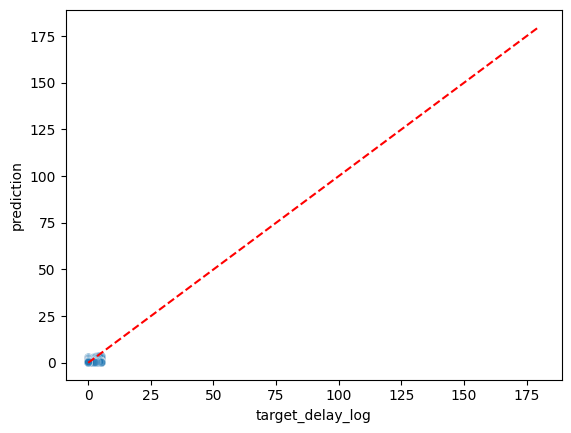

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only relevant columns and convert to Pandas
preds_pd = predictions.select("target_delay_log", "prediction").toPandas()

# Optional: inverse transform if using log target
import numpy as np
preds_pd["actual_delay"] = np.exp(preds_pd["target_delay_log"])
preds_pd["predicted_delay"] = np.exp(preds_pd["prediction"])

# Compute residuals
preds_pd["residuals"] = preds_pd["actual_delay"] - preds_pd["predicted_delay"]

sns.scatterplot(x="target_delay_log", y="prediction", data=preds_pd, alpha=0.3)
plt.plot([0, preds_pd.max().max()], [0, preds_pd.max().max()], '--r', label='Ideal')


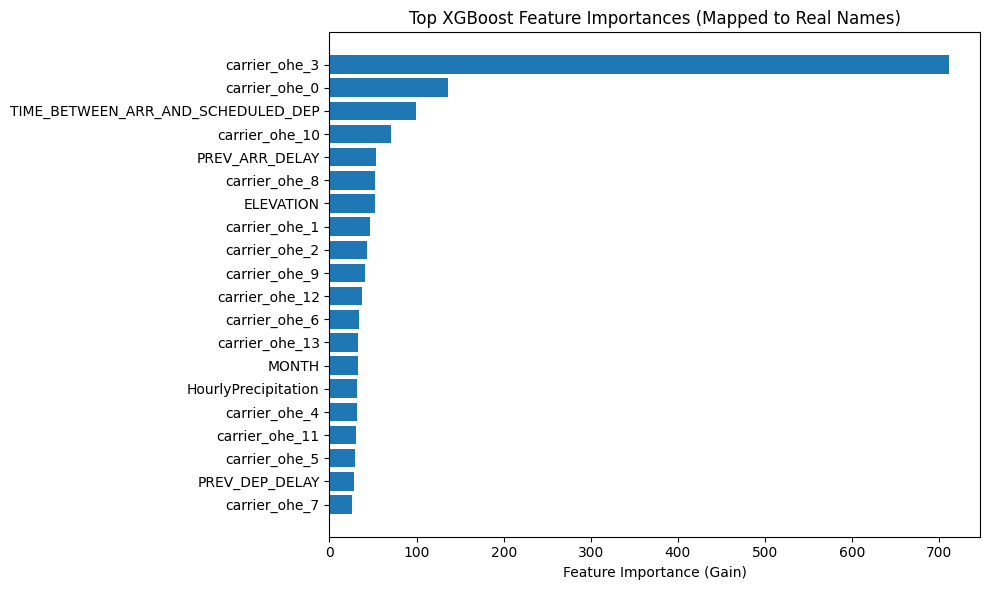

In [0]:
# Extract from trained pipeline
assembler_model = xgb_model.stages[2]  # VectorAssembler
encoder_model = xgb_model.stages[1]    # OneHotEncoderModel
booster = xgb_model.stages[-1].get_booster()

# Rebuild input names
numeric_cols = assembler_model.getInputCols()[:-1]   # everything before 'carrier_ohe'
ohe_base_name = assembler_model.getInputCols()[-1]   # typically 'carrier_ohe'

# Get number of dummy variables (categories - 1)
num_ohe_features = encoder_model.categorySizes[0]

# Reconstruct full feature list
full_feature_names = numeric_cols + [f"{ohe_base_name}_{i}" for i in range(num_ohe_features)]

# Map importance
raw_importance = booster.get_score(importance_type="gain")
importances = []

for k, v in raw_importance.items():
    idx = int(k[1:])  # f0 → 0
    if idx < len(full_feature_names):
        importances.append((full_feature_names[idx], v))
    else:
        importances.append((f"unknown_f{idx}", v))  # fail-safe

# Sort and plot
importances.sort(key=lambda x: x[1], reverse=True)
top_n = 20
top_features = importances[:top_n]
names, scores = zip(*top_features)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(scores)), scores[::-1])
plt.yticks(range(len(scores)), [name for name in names[::-1]])
plt.xlabel("Feature Importance (Gain)")
plt.title("Top XGBoost Feature Importances (Mapped to Real Names)")
plt.tight_layout()
plt.show()


In [0]:
from pyspark.sql.functions import col, when, to_date, log, exp
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from xgboost.spark import SparkXGBRegressor

# Step 1: Define base numeric features
numeric_cols = [
    "CRS_ELAPSED_TIME", "DISTANCE", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK",  
    "DISTANCE_GROUP", "TIME_BETWEEN_ARR_AND_SCHEDULED_DEP",
    "PREV_DEP_DELAY", "PREV_ARR_DELAY", "ELEVATION",
    "HourlyStationPressure", "HourlyAltimeterSetting", 
    "HourlyWetBulbTemperature", "HourlySeaLevelPressure",
    "HourlyDryBulbTemperature", "QUARTER", "HourlyPrecipitation"
]

# Step 2: Feature engineering - interaction terms
df_final = df_final.withColumn("CRS_TIME_X_DIST", col("CRS_ELAPSED_TIME") * col("DISTANCE"))
df_final = df_final.withColumn("ELEV_X_TEMP", col("ELEVATION") * col("HourlyDryBulbTemperature"))
df_final = df_final.withColumn("ARR_DEP_X_PREV_DELAY", col("PREV_ARR_DELAY") * col("PREV_DEP_DELAY"))
df_final = df_final.withColumn("DIST_X_MONTH", col("DISTANCE") * col("MONTH"))
numeric_cols += ["CRS_TIME_X_DIST", "ELEV_X_TEMP", "ARR_DEP_X_PREV_DELAY", "DIST_X_MONTH"]

# Step 3: Cast numeric features and DEP_DELAY to float
for col_name in numeric_cols + ["DEP_DELAY"]:
    df_final = df_final.withColumn(col_name, col(col_name).cast("float"))

# Step 4: Target transformation (cap and log)
df_final = df_final.withColumn("target_delay_log", when(col("DEP_DELAY") > 300, 300).otherwise(col("DEP_DELAY")))
df_final = df_final.withColumn("target_delay_log", when(col("target_delay_log") < 0.1, 0.1).otherwise(col("target_delay_log")))
df_final = df_final.withColumn("target_delay_log", log(col("target_delay_log")))

# Step 5: Prep and filter clean data
df_final = df_final.withColumn("FL_DATE", to_date("FL_DATE"))
df_clean = df_final.select(numeric_cols + ["target_delay_log", "OP_UNIQUE_CARRIER", "FL_DATE"]).dropna()

# Step 6: Categorical encoding (still using OHE but could replace with frequency encoding)
indexer = StringIndexer(inputCol="OP_UNIQUE_CARRIER", outputCol="carrier_index", handleInvalid="keep")
encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_ohe")

# Step 7: Assemble features
assembler = VectorAssembler(inputCols=numeric_cols + ["carrier_ohe"], outputCol="raw_features")

# Step 8: Normalize features
scaler = StandardScaler(inputCol="raw_features", outputCol="features")

# Step 9: Define XGBoost model with improved regularization
xgb = SparkXGBRegressor(
    features_col="features",
    label_col="target_delay_log",
    prediction_col="prediction",
    objective="reg:squarederror",
    num_round=500,
    max_depth=8,
    eta=0.02,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=1.0,
    reg_lambda=5.0,
    missing=0.0
)

# Step 10: Build full pipeline
pipeline = Pipeline(stages=[indexer, encoder, assembler, scaler, xgb])

# Step 11: Rolling time-series CV
from pyspark.sql.functions import col
unique_dates = [row["FL_DATE"] for row in df_clean.select("FL_DATE").distinct().sort("FL_DATE").collect()]
folds = 5
window_size = len(unique_dates) // (folds + 1)

metrics = []

for i in range(folds):
    train_end_date = unique_dates[(i + 1) * window_size]
    test_start_date = unique_dates[(i + 1) * window_size]
    test_end_date = unique_dates[(i + 2) * window_size] if (i + 2) * window_size < len(unique_dates) else unique_dates[-1]

    train_data = df_clean.filter(col("FL_DATE") < train_end_date)
    test_data = df_clean.filter((col("FL_DATE") >= test_start_date) & (col("FL_DATE") < test_end_date))

    model = pipeline.fit(train_data)
    predictions = model.transform(test_data)

    # Reverse log transform for real-world error
    predictions = predictions.withColumn("predicted_delay", exp(col("prediction")))

    # Evaluate
    eval_r2 = RegressionEvaluator(labelCol="target_delay_log", predictionCol="prediction", metricName="r2")
    eval_rmse = RegressionEvaluator(labelCol="target_delay_log", predictionCol="prediction", metricName="rmse")
    eval_mae = RegressionEvaluator(labelCol="target_delay_log", predictionCol="prediction", metricName="mae")

    r2 = eval_r2.evaluate(predictions)
    rmse = eval_rmse.evaluate(predictions)
    mae = eval_mae.evaluate(predictions)

    print(f"\nFold {i+1} — R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    metrics.append((r2, rmse, mae))

# Step 12: Average metrics
avg_r2 = sum([m[0] for m in metrics]) / folds
avg_rmse = sum([m[1] for m in metrics]) / folds
avg_mae = sum([m[2] for m in metrics]) / folds

print("\nAverage Cross-Validated Results (log-transformed delay):")
print(f"R²: {avg_r2:.4f}")
print(f"RMSE: {avg_rmse:.4f}")
print(f"MAE: {avg_mae:.4f}")


2025-07-25 03:51:25,114 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 1.0, 'reg_lambda': 5.0, 'subsample': 0.7, 'num_round': 500, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 03:53:35,750 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 1 — R²: 0.0687, RMSE: 2.0291, MAE: 1.6540


2025-07-25 04:09:24,918 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 1.0, 'reg_lambda': 5.0, 'subsample': 0.7, 'num_round': 500, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 04:14:19,395 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 2 — R²: 0.0862, RMSE: 2.1064, MAE: 1.6478


2025-07-25 04:31:23,710 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 1.0, 'reg_lambda': 5.0, 'subsample': 0.7, 'num_round': 500, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 04:34:34,435 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 3 — R²: 0.1052, RMSE: 2.0850, MAE: 1.7067


2025-07-25 04:49:13,752 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 1.0, 'reg_lambda': 5.0, 'subsample': 0.7, 'num_round': 500, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 04:52:37,935 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 4 — R²: 0.0322, RMSE: 1.8526, MAE: 1.4959


2025-07-25 05:09:22,769 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.7, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 1.0, 'reg_lambda': 5.0, 'subsample': 0.7, 'num_round': 500, 'eta': 0.02, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 05:13:03,514 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 5 — R²: 0.0590, RMSE: 2.0082, MAE: 1.5208

Average Cross-Validated Results (log-transformed delay):
R²: 0.0702
RMSE: 2.0162
MAE: 1.6051


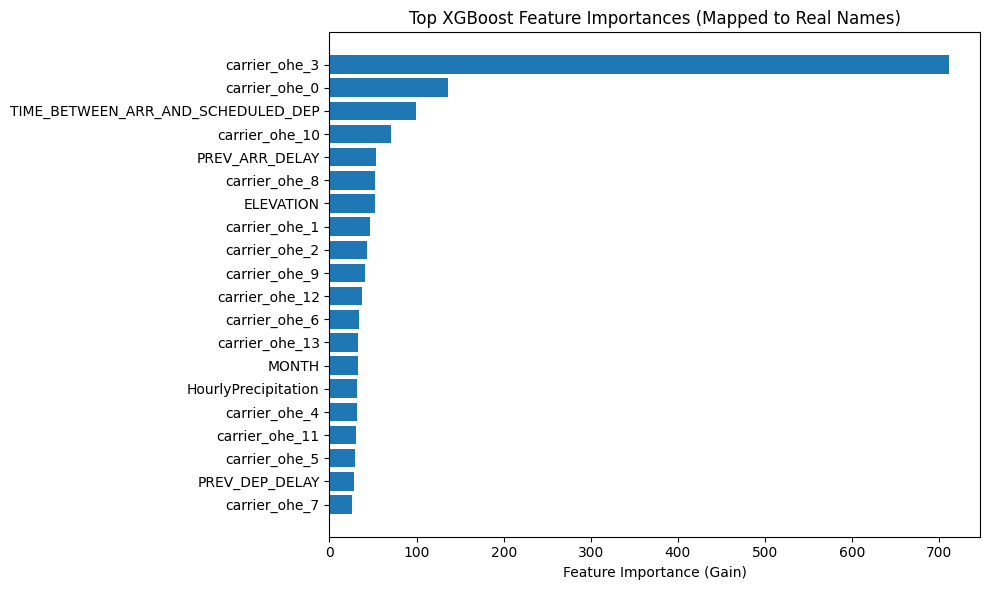

In [0]:
# Extract from trained pipeline
assembler_model = xgb_model.stages[2]  # VectorAssembler
encoder_model = xgb_model.stages[1]    # OneHotEncoderModel
booster = xgb_model.stages[-1].get_booster()

# Rebuild input names
numeric_cols = assembler_model.getInputCols()[:-1]   # everything before 'carrier_ohe'
ohe_base_name = assembler_model.getInputCols()[-1]   # typically 'carrier_ohe'

# Get number of dummy variables (categories - 1)
num_ohe_features = encoder_model.categorySizes[0]

# Reconstruct full feature list
full_feature_names = numeric_cols + [f"{ohe_base_name}_{i}" for i in range(num_ohe_features)]

# Map importance
raw_importance = booster.get_score(importance_type="gain")
importances = []

for k, v in raw_importance.items():
    idx = int(k[1:])  # f0 → 0
    if idx < len(full_feature_names):
        importances.append((full_feature_names[idx], v))
    else:
        importances.append((f"unknown_f{idx}", v))  # fail-safe

# Sort and plot
importances.sort(key=lambda x: x[1], reverse=True)
top_n = 20
top_features = importances[:top_n]
names, scores = zip(*top_features)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(scores)), scores[::-1])
plt.yticks(range(len(scores)), [name for name in names[::-1]])
plt.xlabel("Feature Importance (Gain)")
plt.title("Top XGBoost Feature Importances (Mapped to Real Names)")
plt.tight_layout()
plt.show()


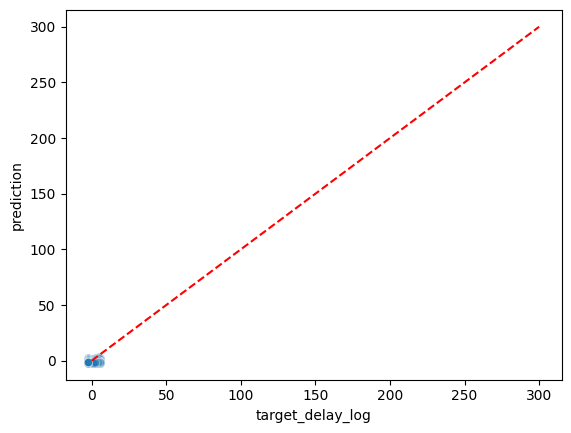

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only relevant columns and convert to Pandas
preds_pd = predictions.select("target_delay_log", "prediction").toPandas()

# Optional: inverse transform if using log target
import numpy as np
preds_pd["actual_delay"] = np.exp(preds_pd["target_delay_log"])
preds_pd["predicted_delay"] = np.exp(preds_pd["prediction"])

# Compute residuals
preds_pd["residuals"] = preds_pd["actual_delay"] - preds_pd["predicted_delay"]

sns.scatterplot(x="target_delay_log", y="prediction", data=preds_pd, alpha=0.3)
plt.plot([0, preds_pd.max().max()], [0, preds_pd.max().max()], '--r', label='Ideal')


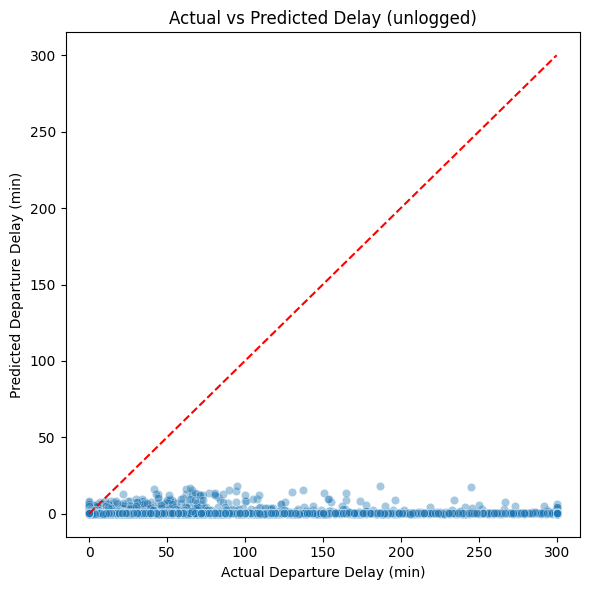

In [0]:
from pyspark.sql.functions import exp

predictions = predictions.withColumn("predicted_delay", exp("prediction"))
predictions = predictions.withColumn("actual_delay", exp("target_delay_log"))
pdf = predictions.select("actual_delay", "predicted_delay").toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(data=pdf, x="actual_delay", y="predicted_delay", alpha=0.4)
plt.plot([0, 300], [0, 300], 'r--')  # Perfect prediction line
plt.xlabel("Actual Departure Delay (min)")
plt.ylabel("Predicted Departure Delay (min)")
plt.title("Actual vs Predicted Delay (unlogged)")
plt.tight_layout()
plt.show()


In [0]:
# Get all input columns to assembler
assembler_inputs = assembler.getInputCols()
print("Assembler input columns:\n", assembler_inputs)


Assembler input columns:
 ['CRS_ELAPSED_TIME', 'DISTANCE', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE_GROUP', 'TIME_BETWEEN_ARR_AND_SCHEDULED_DEP', 'PREV_DEP_DELAY', 'PREV_ARR_DELAY', 'ELEVATION', 'HourlyStationPressure', 'HourlyAltimeterSetting', 'HourlyWetBulbTemperature', 'HourlySeaLevelPressure', 'HourlyDryBulbTemperature', 'QUARTER', 'HourlyPrecipitation', 'CRS_TIME_X_DIST', 'ELEV_X_TEMP', 'ARR_DEP_X_PREV_DELAY', 'DIST_X_MONTH', 'carrier_ohe']
